In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 200

C:\Users\Seth Dwumah\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [71]:
# load dataset
df = pd.read_csv("credit_customers.csv")

In [72]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [73]:
df.shape

(1000, 21)

In [74]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [7]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
df.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

### EDA


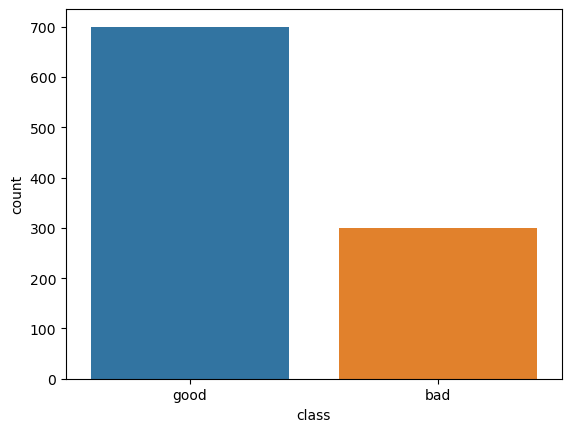

In [9]:
plt.style.use("default")
sns.countplot(df['class'])
plt.show()

In [10]:
# group the categorical and numerical features
categorical = []
numerical = []
for col in df.columns:
    if df[col].dtype == "O":
        categorical.append(col)
    else:
        numerical.append(col)   

In [11]:
categorical

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker',
 'class']

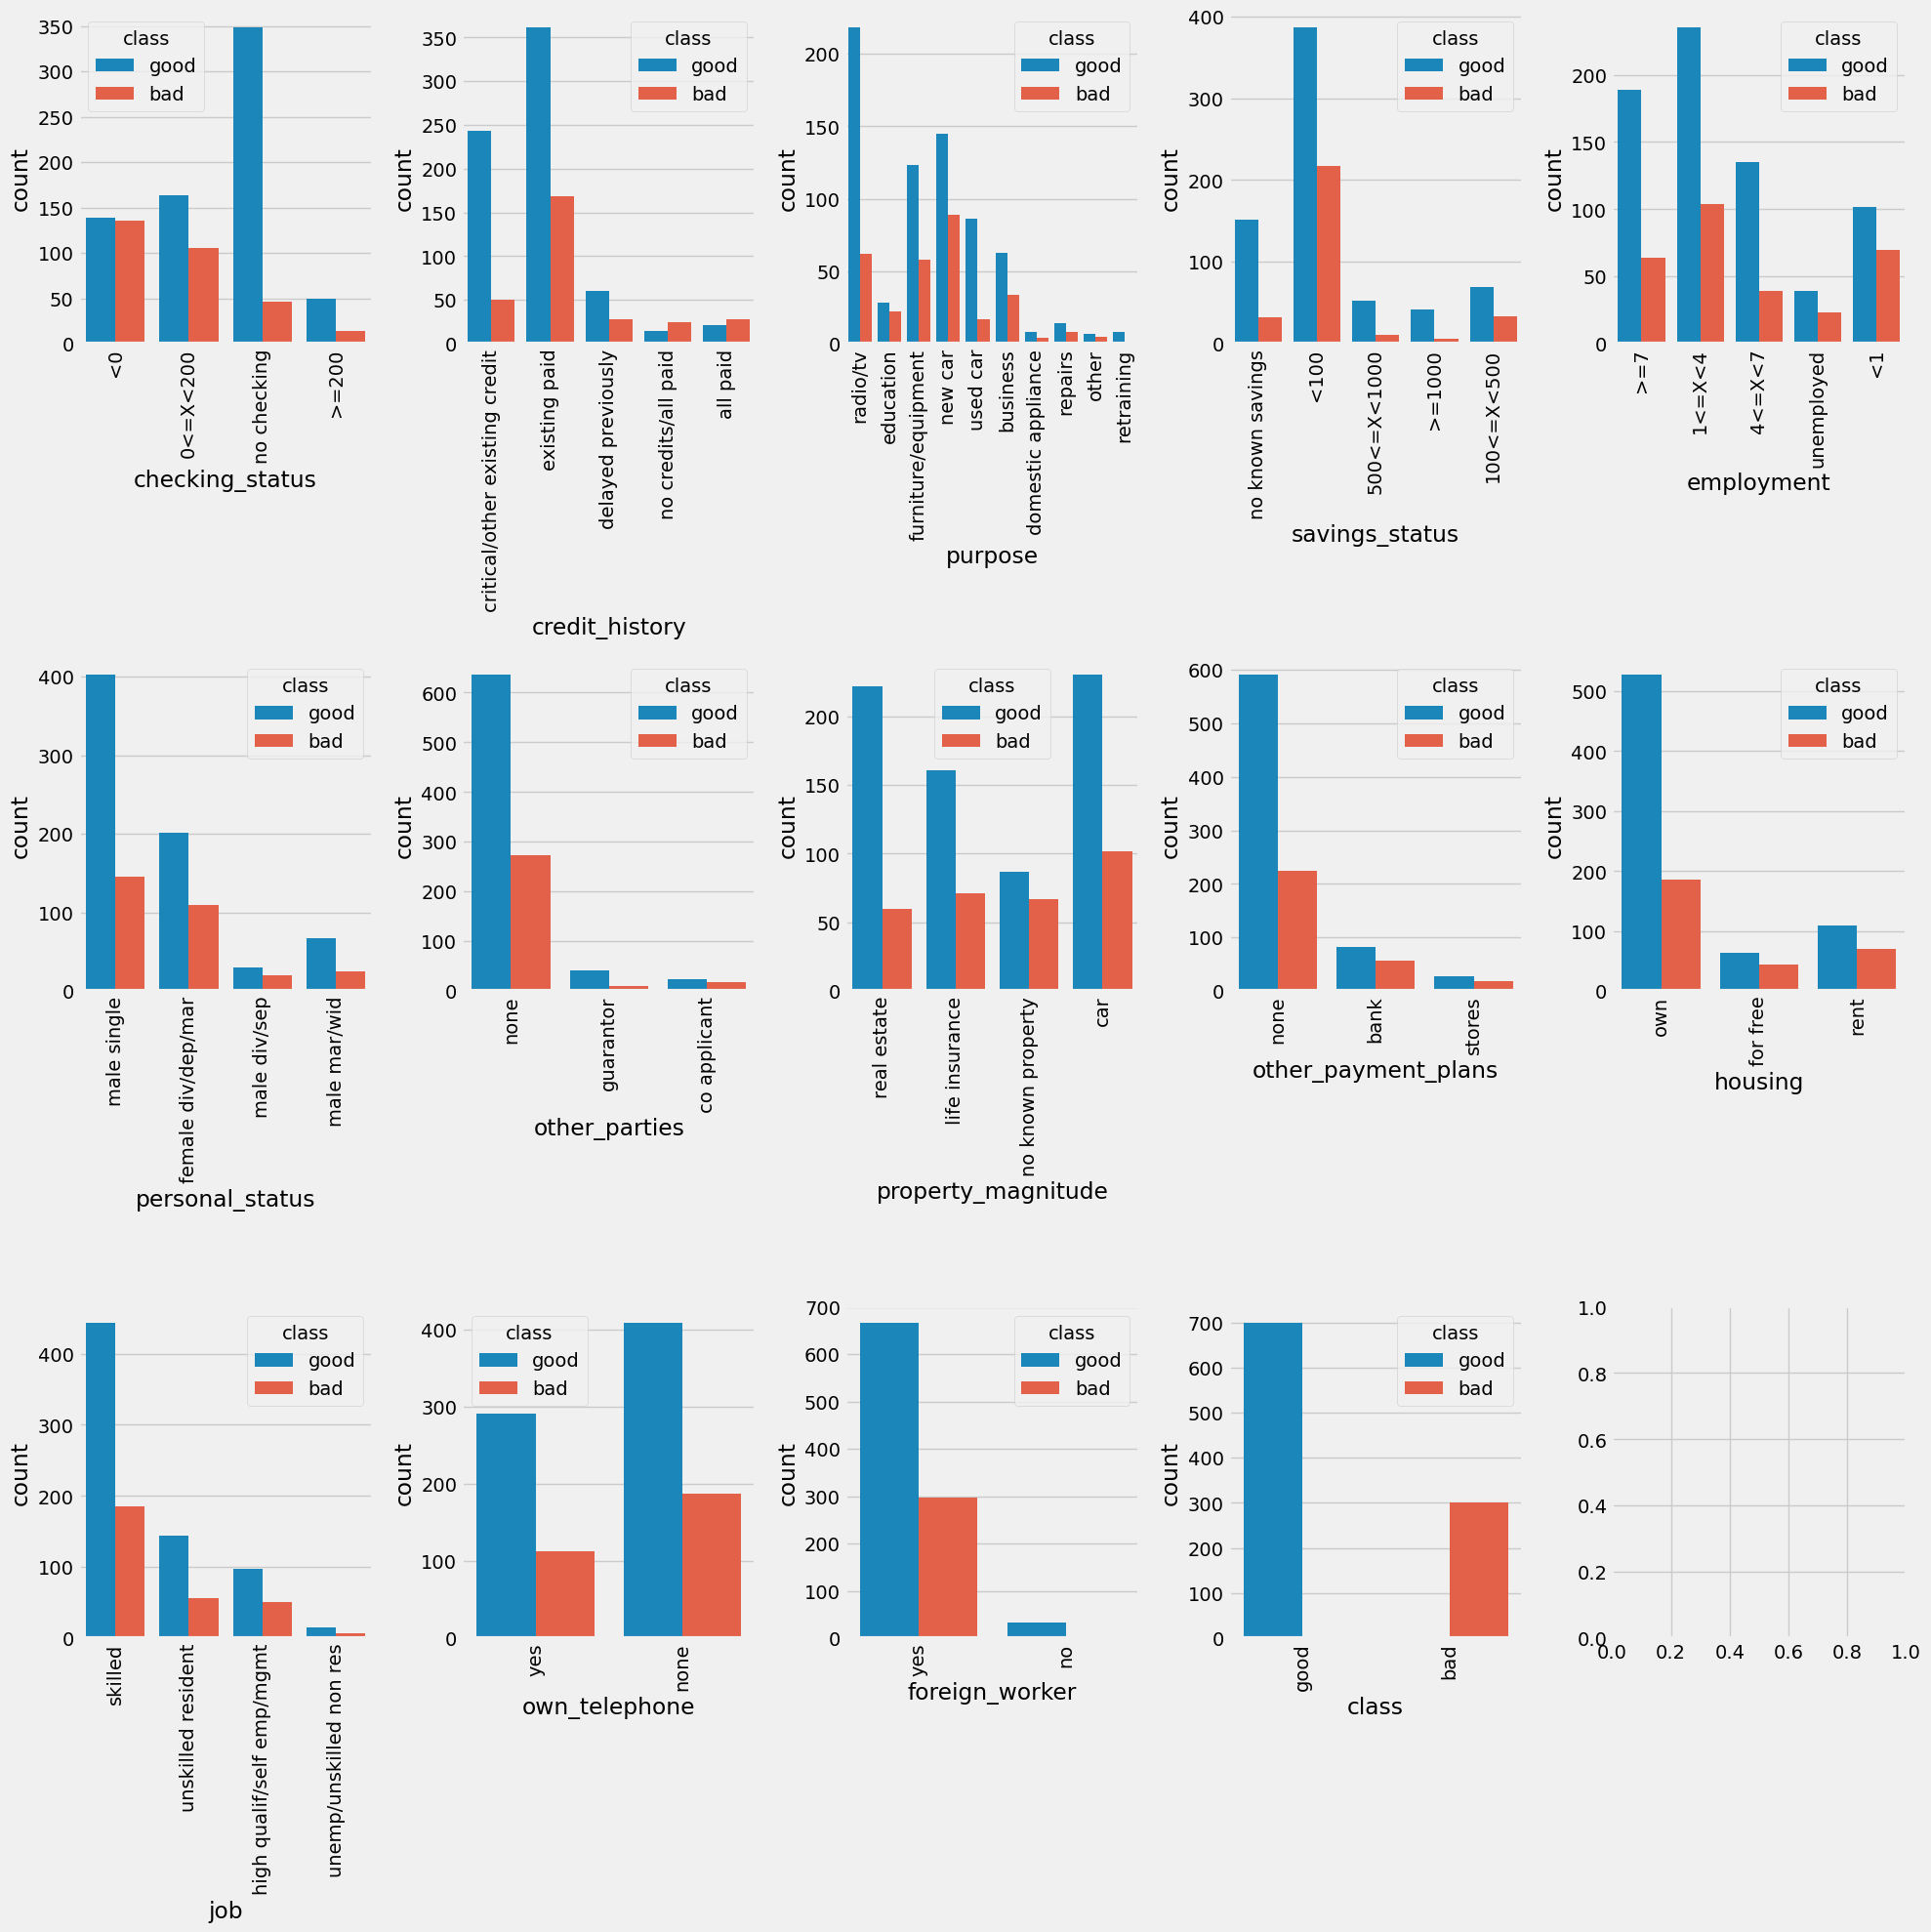

In [12]:
# visualize the categorical features
plt.style.use("fivethirtyeight")
fig, axs = plt.subplots(nrows= 3, ncols =5, figsize=(20,20))
axs = axs.flatten()

for i, cat in enumerate(categorical):
    sns.countplot(x=cat, data=df, hue='class',ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
    
fig.tight_layout()
plt.show()

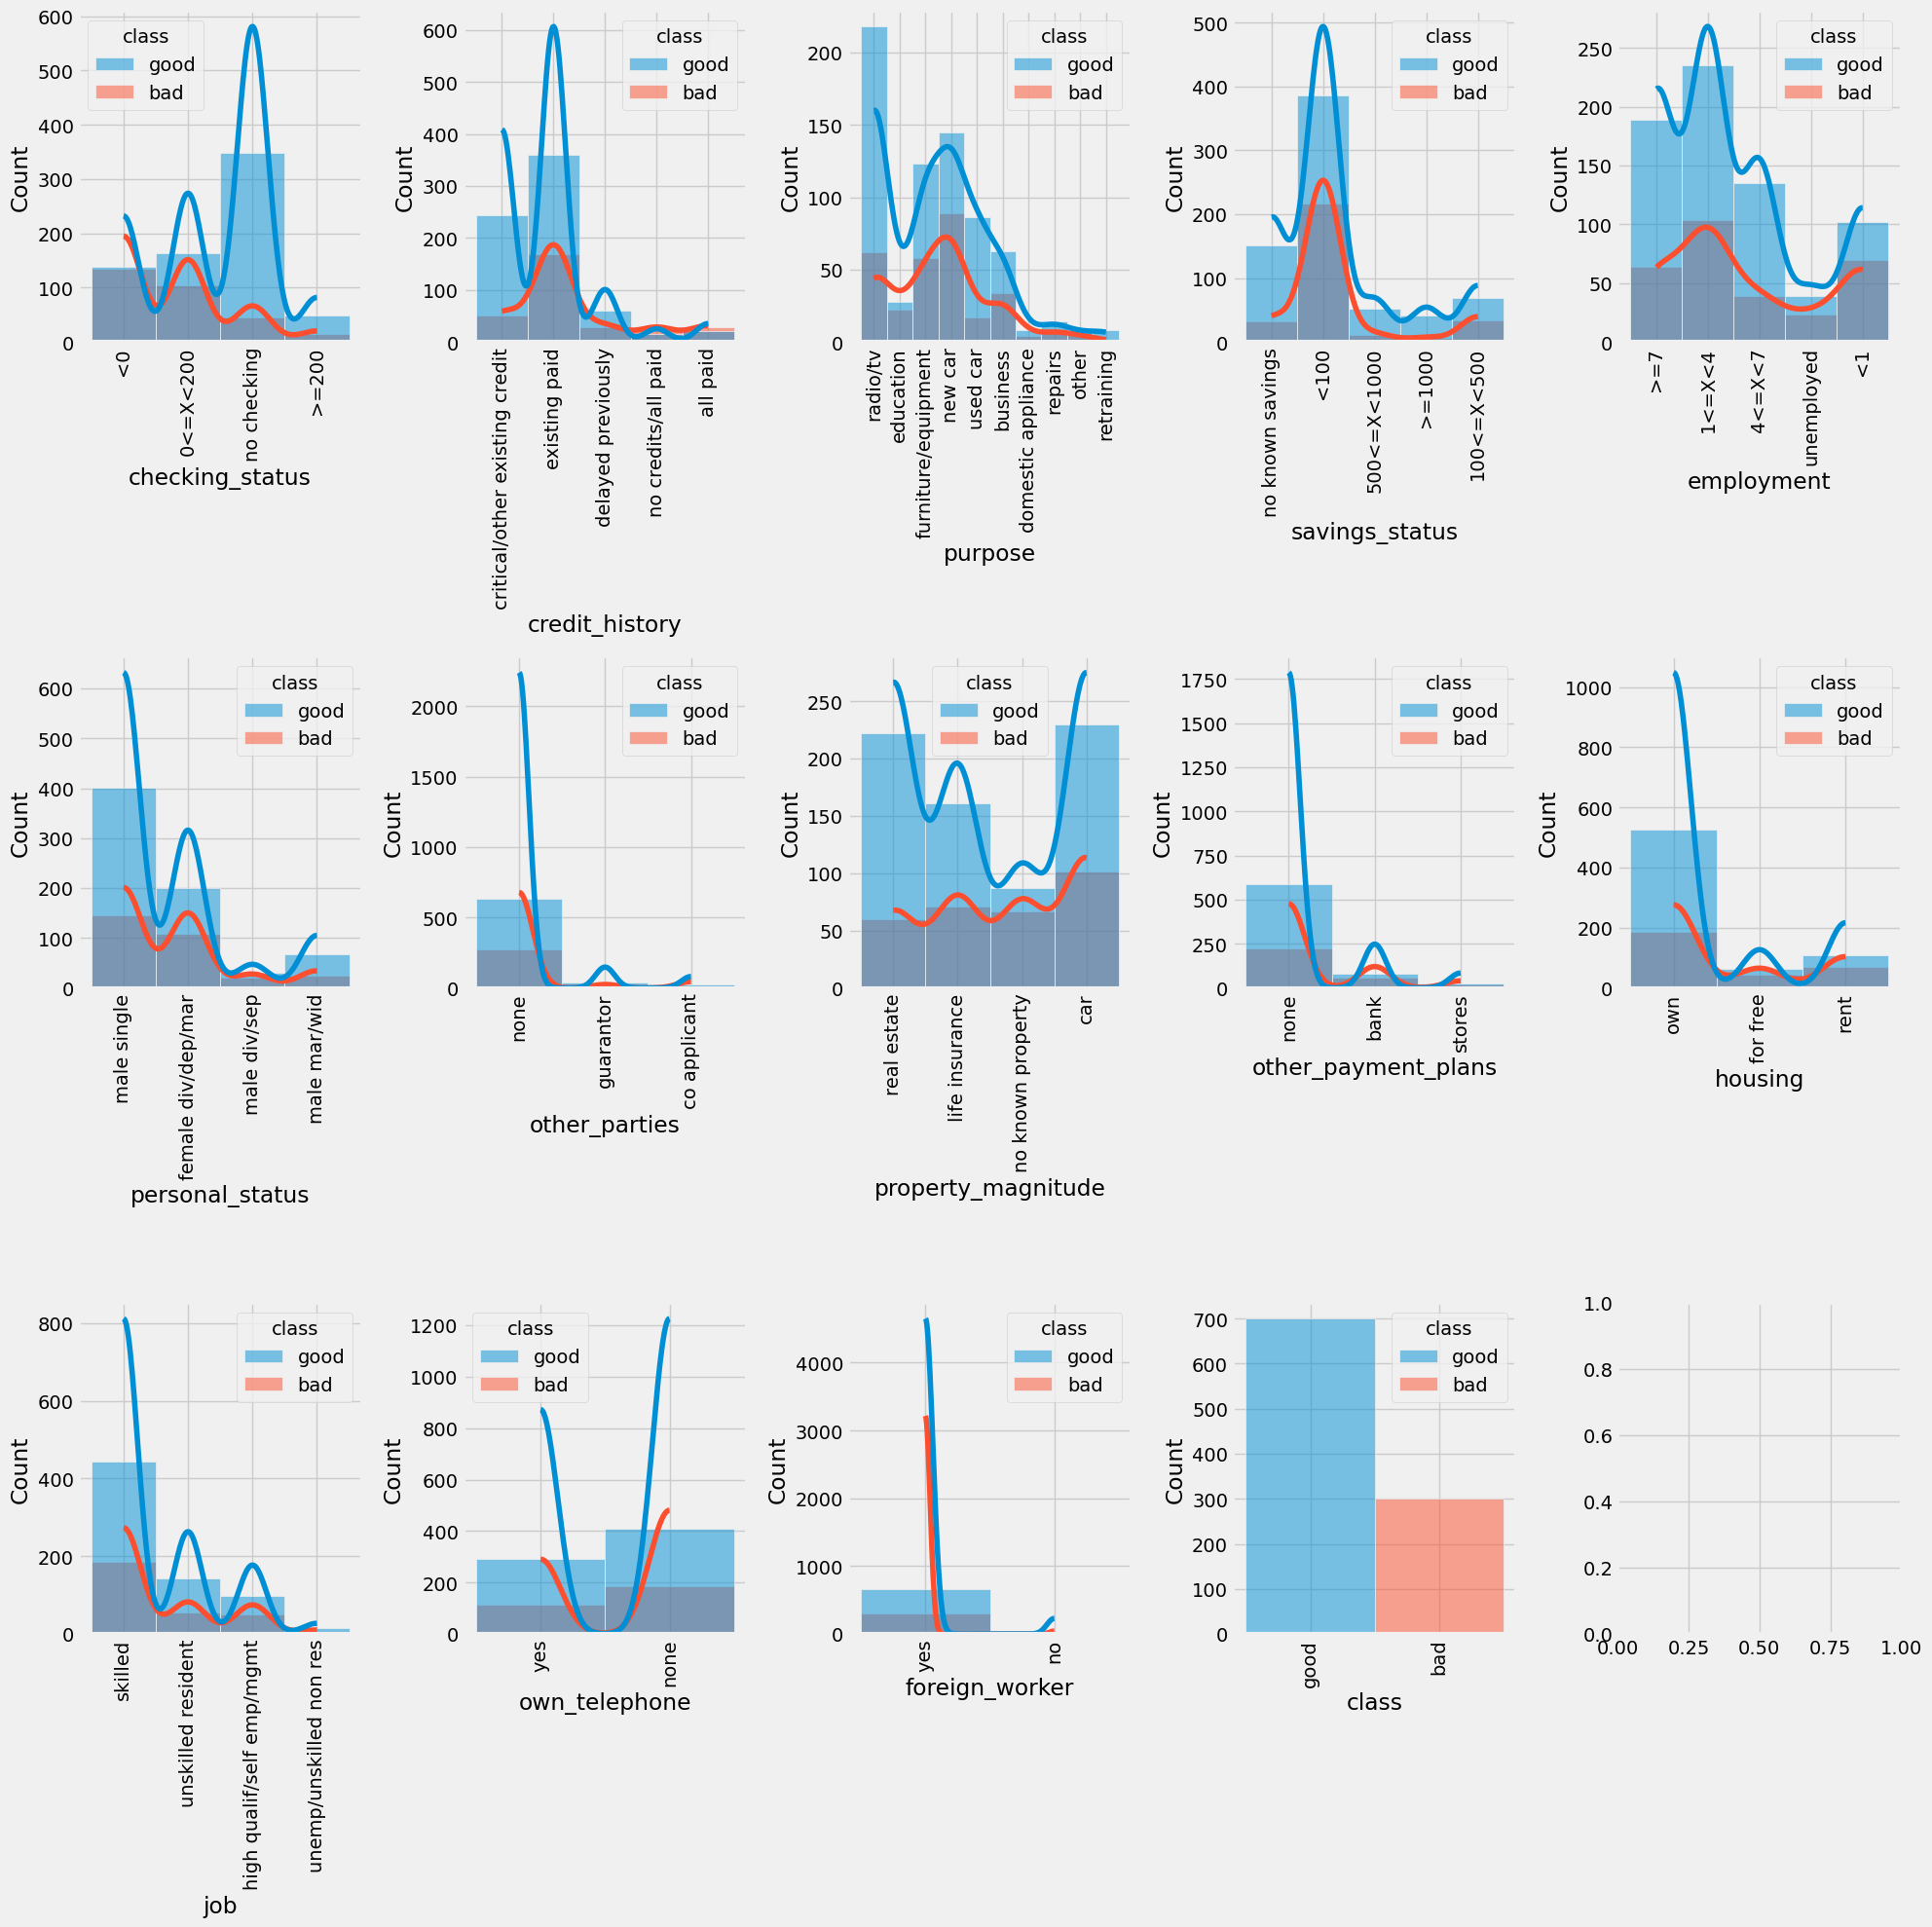

In [14]:
# histplot of the categorical features
plt.style.use("fivethirtyeight")
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20,20))
axs = axs.flatten()

for i, cat in enumerate(categorical):
    sns.histplot(x= cat, hue='class',data=df,kde=True,ax =axs[i])
    axs[i].set_xticklabels(df[cat].unique(),rotation=90)
    
fig.tight_layout()
plt.show()

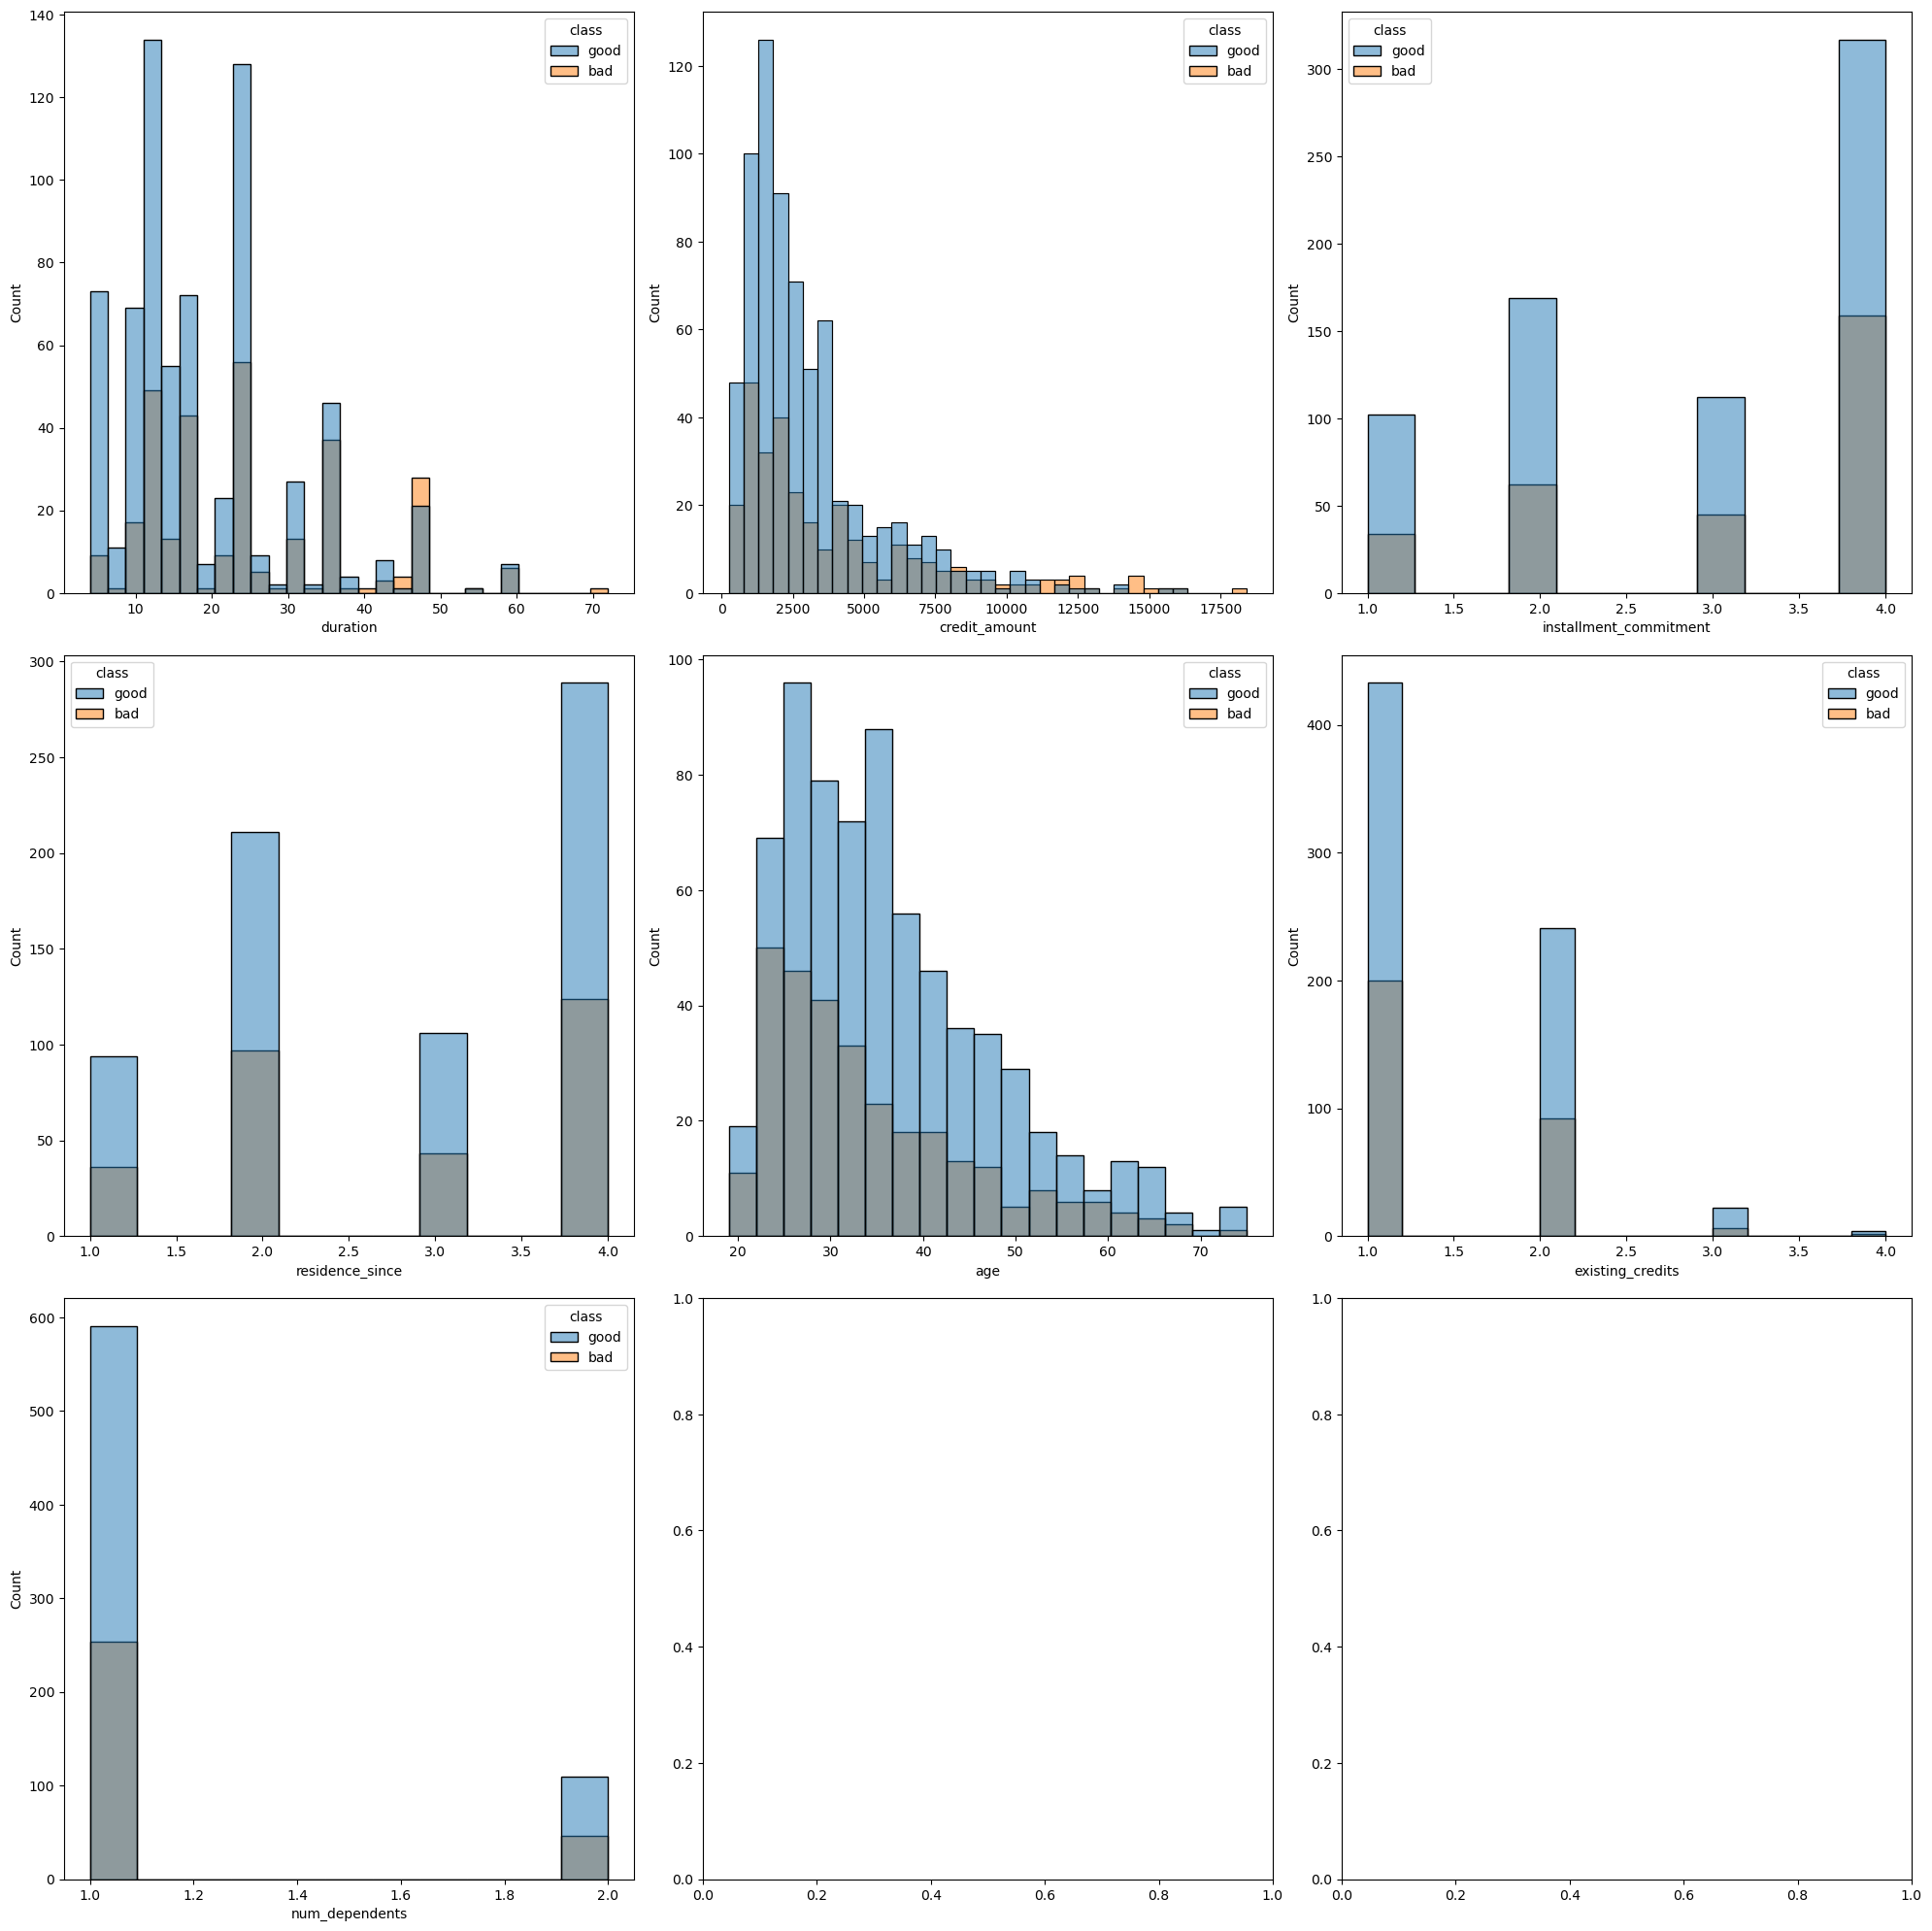

In [67]:
# visualize the numerical features
plt.style.use("default")
fig, axs = plt.subplots(nrows =3, ncols=3 , figsize=(20,20))
axs = axs.flatten()

for i, cat in enumerate(numerical):
    sns.histplot(x=cat,data=df, ax =axs[i],hue=df['class'])
    
    
fig.tight_layout()
plt.show()
    

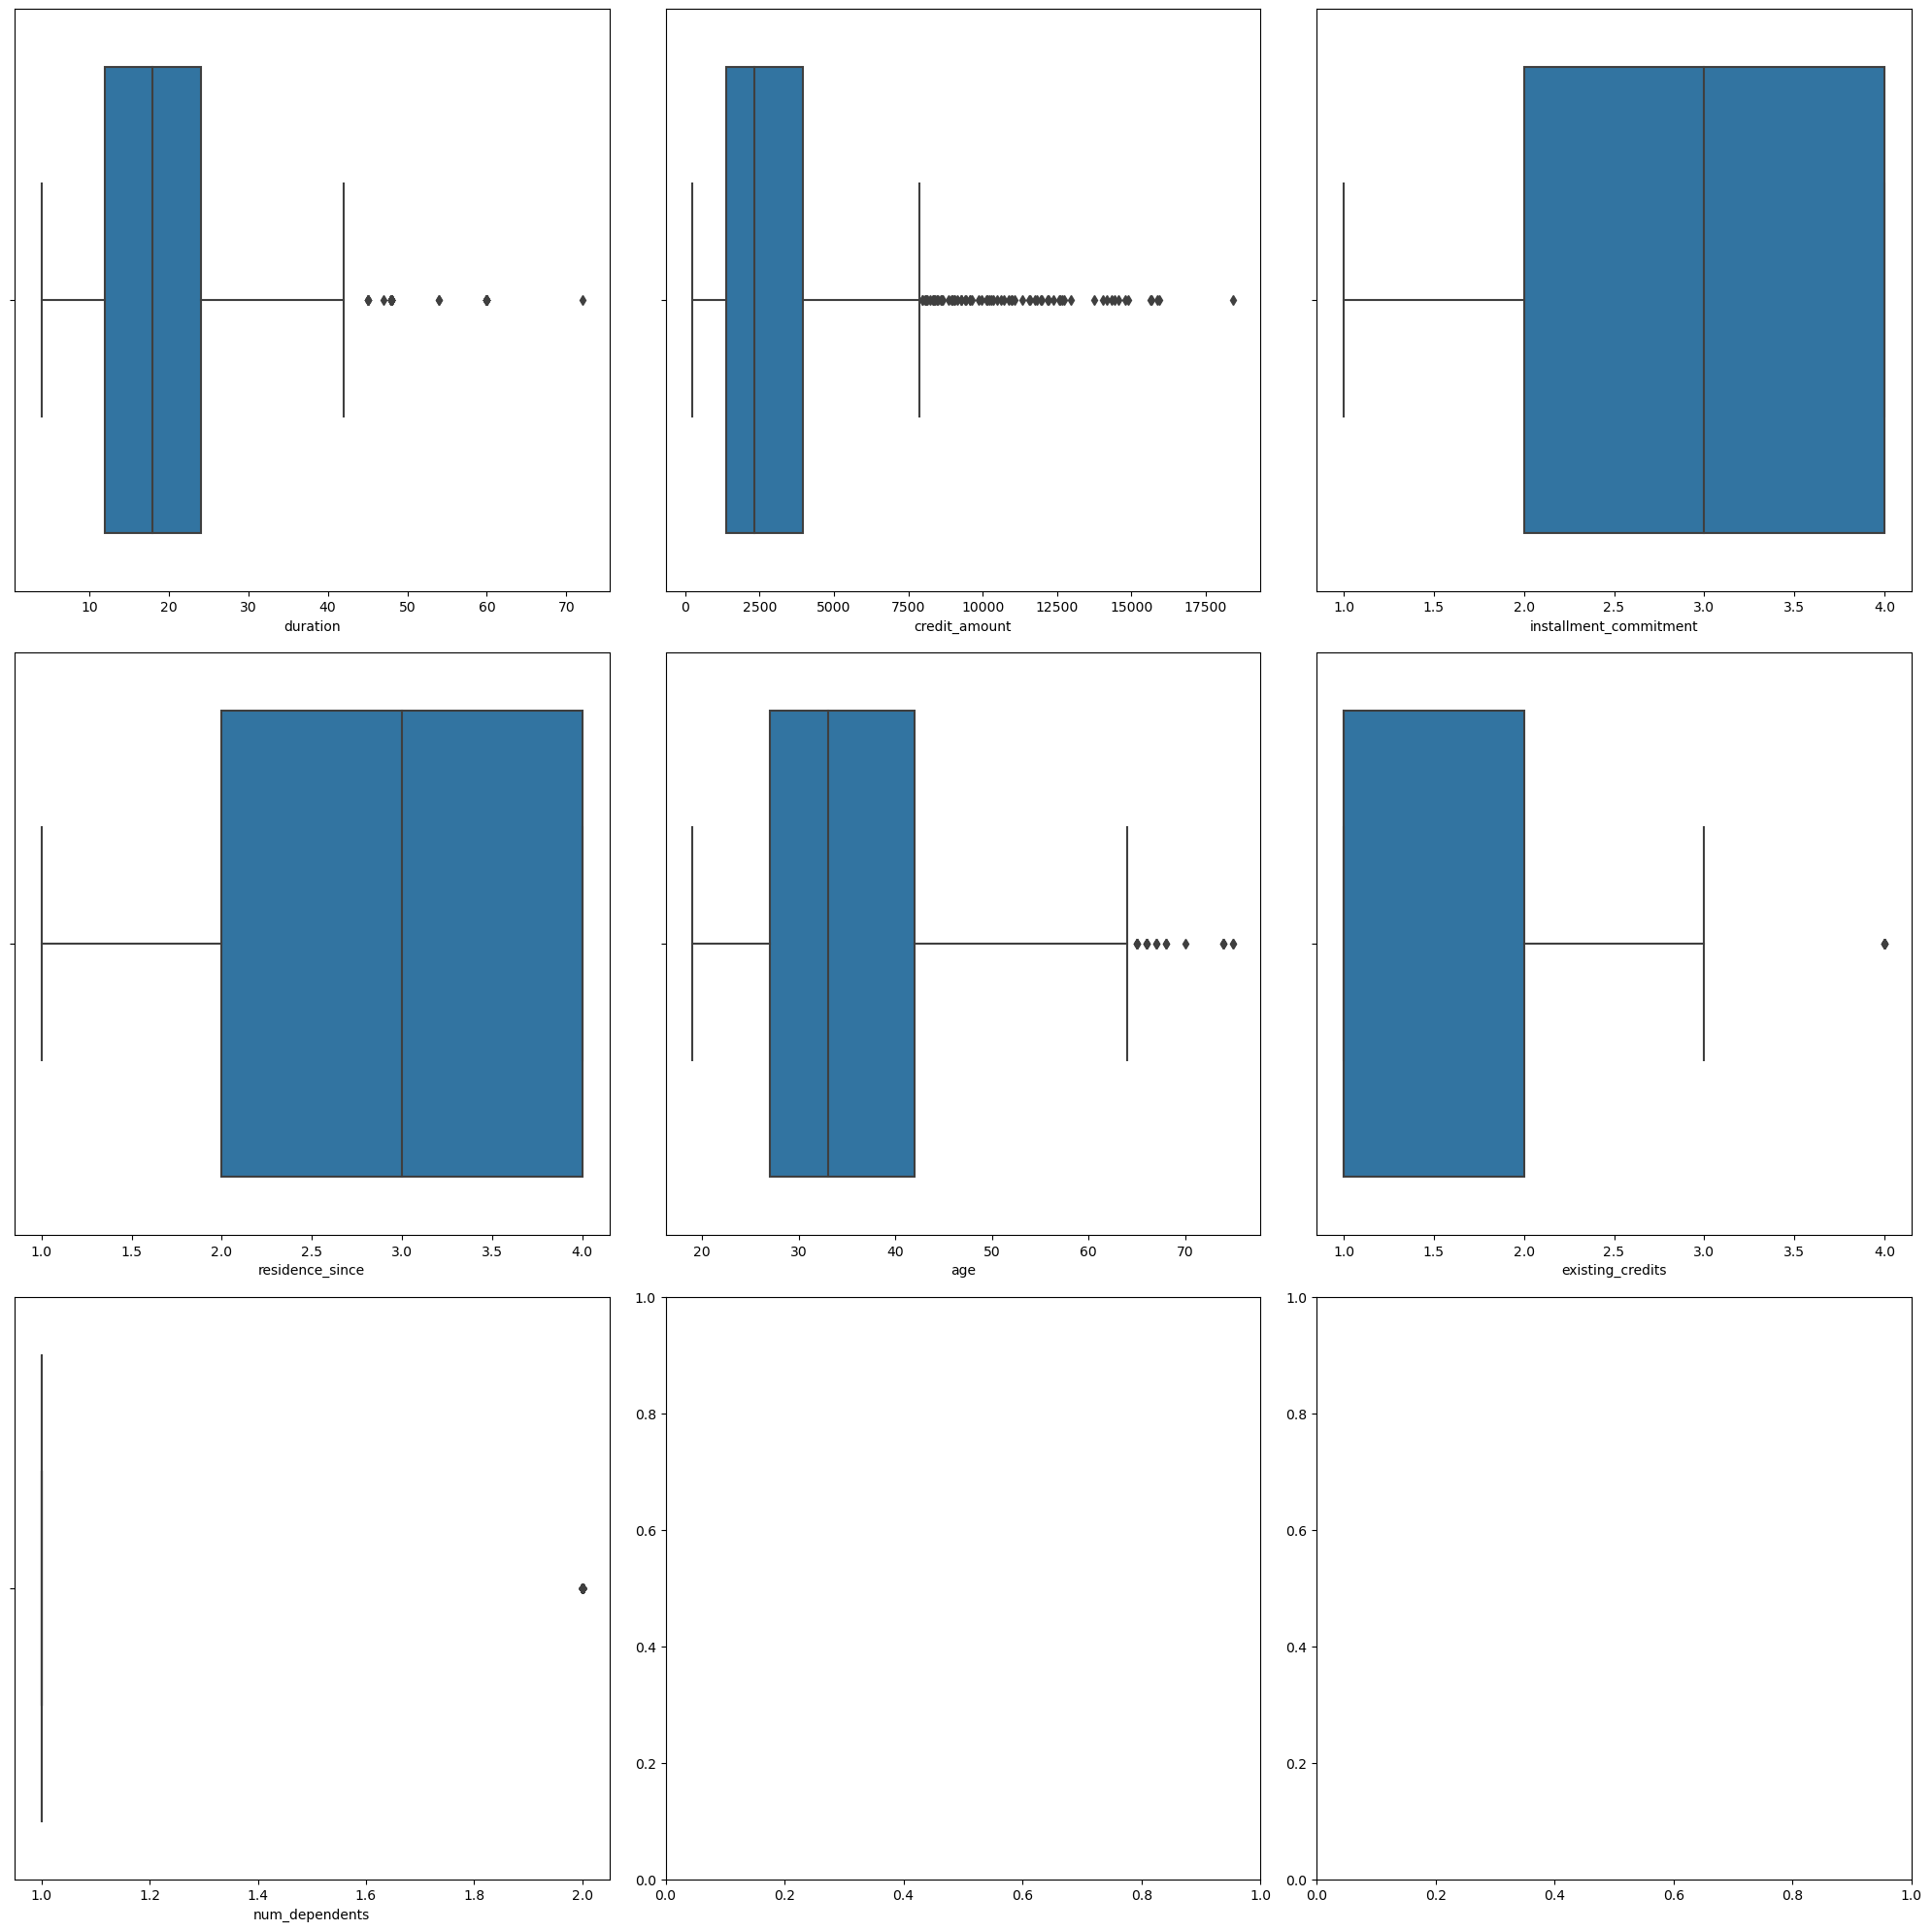

In [46]:

plt.style.use("default")
fig, axs = plt.subplots(nrows =3, ncols=3 , figsize=(20,20))
axs = axs.flatten()

for i, cat in enumerate(numerical):
    sns.boxplot(x=cat,data=df, ax =axs[i])
    
fig.tight_layout()
plt.show()
    

In [75]:
# lets deal with the outliers

def remove_outlier(data):
    for col in data.columns:
        
        Q1 =np.percentile(data[col],25)
        Q3 = np.percentile(data[col], 75)
        
        IQR =Q3 - Q1
        lower_bound =Q1 - 1.5*IQR
        upper_bound = Q3+1.5*IQR
        data = data[(data[col] >=lower_bound) & (data[col]<=upper_bound)]
    return data

In [77]:
#remove_outlier(df[numerical])

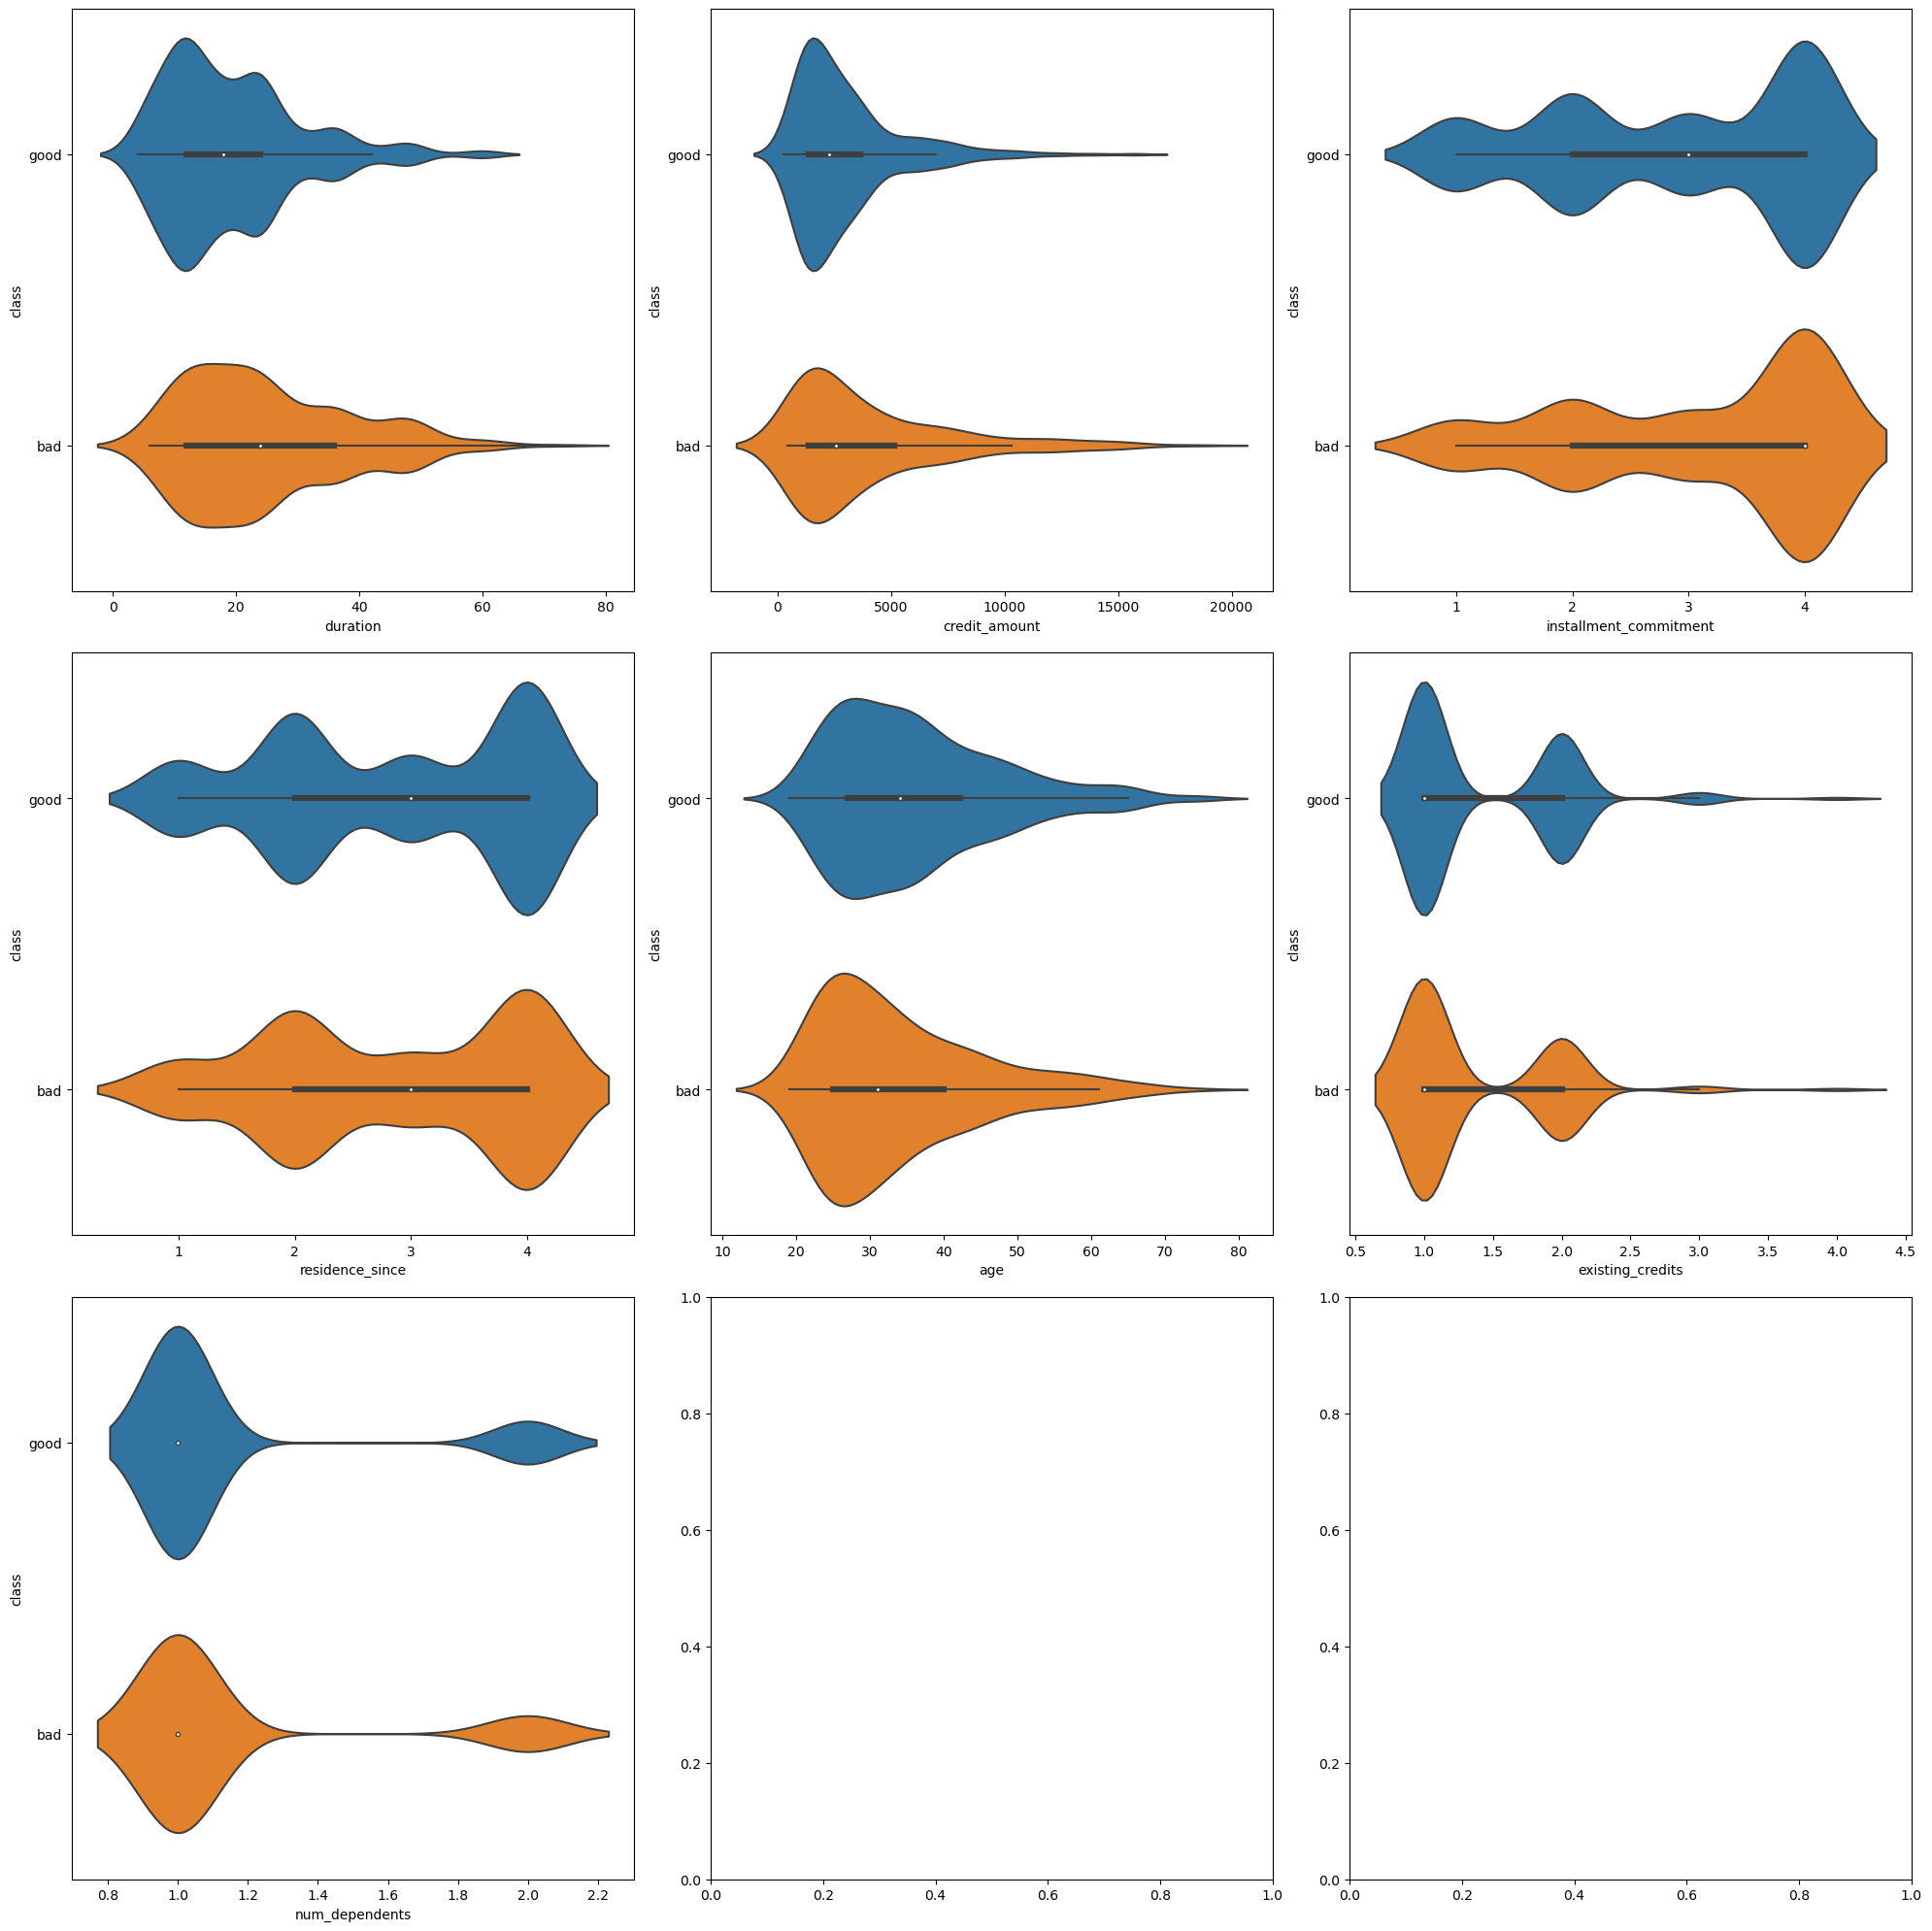

In [33]:

#plt.style.use("")
fig, axs = plt.subplots(nrows =3, ncols=3 , figsize=(20,20))
axs = axs.flatten()

for i, cat in enumerate(numerical):
    sns.violinplot(x=cat, y='class',data=df, ax =axs[i])
    
   
fig.tight_layout()
plt.show()
    

### Statistical Testing using Chisquare

In [18]:
import stats
from scipy.stats import chi2_contingency

In [22]:
a=np.array(pd.crosstab(df['class'],df['job']))
(stats,p,dof,_) = chi2_contingency(a,correction=False)

In [24]:
stats,p,dof

(1.8851560280131707, 0.5965815918843431, 3)

In [29]:
for i in categorical:
    print(i+":")
    
    a=np.array(pd.crosstab(df['class'],df[i]))
    (stats,p,dof,_) = chi2_contingency(a,correction=False)
    
    if p>0.05:
        print(" '{}' is a bad Predictor".format(i))
        print('p_val={}\n'.format(p))
    else:
        print( " '{}' is Good Predictor".format(i))
        print('p_val={}\n'.format(p))

checking_status:
 'checking_status' is Good Predictor
p_val=1.2189020722893755e-26

credit_history:
 'credit_history' is Good Predictor
p_val=1.2791872956750918e-12

purpose:
 'purpose' is Good Predictor
p_val=0.00011574910079691586

savings_status:
 'savings_status' is Good Predictor
p_val=2.761214238568249e-07

employment:
 'employment' is Good Predictor
p_val=0.0010454523491402522

personal_status:
 'personal_status' is Good Predictor
p_val=0.02223800546926877

other_parties:
 'other_parties' is Good Predictor
p_val=0.036055954027247206

property_magnitude:
 'property_magnitude' is Good Predictor
p_val=2.8584415733250017e-05

other_payment_plans:
 'other_payment_plans' is Good Predictor
p_val=0.0016293178186473534

housing:
 'housing' is Good Predictor
p_val=0.00011167465374597684

job:
 'job' is a bad Predictor
p_val=0.5965815918843431

own_telephone:
 'own_telephone' is a bad Predictor
p_val=0.2488438213033109

foreign_worker:
 'foreign_worker' is Good Predictor
p_val=0.0094430962

From the chi_square testing, 'job','own_telephone' are bad predictors of the target variable.
The bad predictors needs to be dropped

### Data Preprocessing

In [119]:
data = df.copy()

In [120]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [124]:
# convert categorical features to numerical

def convert_cat(DF):
    for i in DF.columns:
        if DF[i].dtype=='O':
            DF[i] = DF[i].astype('category').cat.codes
            
    return DF

In [125]:
data_process = convert_cat(data)

In [123]:
data_process.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,...,3,67.0,1,1,2.0,1,1.0,1,1,1
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,...,3,22.0,1,1,1.0,1,1.0,0,1,0
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,...,3,49.0,1,1,1.0,3,2.0,0,1,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,...,1,45.0,1,0,1.0,1,2.0,0,1,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,...,2,53.0,1,0,2.0,1,2.0,0,1,0


In [52]:
# convert class back to categorical 
#data_process['class'] = data_process['class'].map({1:'good',0:'bad'})

In [54]:
#data_process.head()

In [104]:
# drop the bad predictors


data_process.drop(['duration','own_telephone','foreign_worker','credit_history'], axis=1,inplace = True)

In [105]:
data_process.head()

,checking_status,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,class
0,1,6,1169.0,4,3,4.0,3,2,4.0,3,67.0,1,1,2.0,1,1.0,1
1,0,6,5951.0,2,0,2.0,0,2,2.0,3,22.0,1,1,1.0,1,1.0,0
2,3,2,2096.0,2,1,2.0,3,2,3.0,3,49.0,1,1,1.0,3,2.0,1
3,1,3,7882.0,2,1,2.0,3,1,4.0,1,45.0,1,0,1.0,1,2.0,1
4,1,4,4870.0,2,0,3.0,3,2,4.0,2,53.0,1,0,2.0,1,2.0,0


In [57]:
corr_df =data_process.corr()
corr_df['class'].sort_values(ascending=False)

class                     1.000000
checking_status           0.302406
purpose                   0.138152
savings_status            0.103133
age                       0.091127
personal_status           0.089535
property_magnitude        0.055529
other_payment_plans       0.053862
existing_credits          0.045732
own_telephone             0.036466
job                       0.032756
other_parties             0.028441
num_dependents            0.003015
residence_since          -0.002967
employment               -0.008932
housing                  -0.019315
installment_commitment   -0.072404
foreign_worker           -0.082079
credit_history           -0.097054
credit_amount            -0.154739
duration                 -0.214927
Name: class, dtype: float64

In [106]:
# Set the feature and target 

X = data_process.iloc[:,:-1]
Y = data_process.iloc[:,-1]

In [107]:
Y.head()

0    1
1    0
2    1
3    1
4    0
Name: class, dtype: int8

### Start the Machine Learning work

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [86]:
# Standardize the feature set
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [109]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2)

### 1. RandomForestClassifier

In [110]:
# train the model
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

rf_pred = rf_model.predict(x_test)

In [111]:
print('Model score: {}'.format(accuracy_score(y_test,rf_pred)*100))
print("********************************************************")
print("Classification Report\n",classification_report(y_test,rf_pred))
print("*"*60)
print("Crosstab\n",pd.crosstab(y_test,rf_pred))

Model score: 70.0
********************************************************
Classification Report
               precision    recall  f1-score   support

           0       0.60      0.35      0.44        68
           1       0.72      0.88      0.79       132

    accuracy                           0.70       200
   macro avg       0.66      0.62      0.62       200
weighted avg       0.68      0.70      0.68       200

************************************************************
Crosstab
 col_0   0    1
class         
0      24   44
1      16  116


### RandomSearchCV hyperparameter tunning

In [ ]:
RandomForestClassifier()

In [90]:
param_dist = ({'n_estimators':[100,250,450,789,1000,],
              'criterion': ["gini", "entropy", "log_loss"],
               'max_depth':[None,1,4,5,7,9],
               'max_features':[None,"sqrt", "log2"]
              })

In [91]:
rand_search = RandomizedSearchCV(RandomForestClassifier(),param_distributions=param_dist, cv=5, n_iter=20,n_jobs=-1, verbose=10)

In [92]:
rand_search.fit(x_train,y_train)
rand_pred = rand_search.predict(x_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [93]:
rand_search.best_params_

{'n_estimators': 1000,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'entropy'}

In [94]:
rand_search.best_score_

0.755

In [95]:
print('Model score: {}'.format(accuracy_score(y_test,rand_pred)*100))
print("********************************************************")
print("Classification Report\n",classification_report(y_test,rand_pred))
print("*"*60)
print("Crosstab\n",pd.crosstab(y_test,rand_pred))

Model score: 76.0
********************************************************
Classification Report
               precision    recall  f1-score   support

           0       0.68      0.36      0.47        59
           1       0.78      0.93      0.85       141

    accuracy                           0.76       200
   macro avg       0.73      0.64      0.66       200
weighted avg       0.75      0.76      0.73       200

************************************************************
Crosstab
 col_0   0    1
class         
0      21   38
1      10  131


### 2. DecisionTree

In [96]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_pred = dt_model.predict(x_test)

In [97]:
print('Model score: {}'.format(accuracy_score(y_test,dt_pred)*100))
print("********************************************************")
print("Classification Report\n",classification_report(y_test,dt_pred))
print("**************************************************************")
print("Crosstab\n",pd.crosstab(y_test,dt_pred))

Model score: 70.5
********************************************************
Classification Report
               precision    recall  f1-score   support

           0       0.50      0.51      0.50        59
           1       0.79      0.79      0.79       141

    accuracy                           0.70       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.71      0.70      0.71       200

**************************************************************
Crosstab
 col_0   0    1
class         
0      30   29
1      30  111


### 3. LogisticRegression

In [98]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_pred = lr_model.predict(x_test)

In [99]:
print('Model score: {}'.format(accuracy_score(y_test,lr_pred)*100))
print("********************************************************")
print("Classification Report\n",classification_report(y_test,lr_pred))
print("**************************************************************")
print("Crosstab\n",pd.crosstab(y_test,lr_pred))

Model score: 73.0
********************************************************
Classification Report
               precision    recall  f1-score   support

           0       0.57      0.34      0.43        59
           1       0.76      0.89      0.82       141

    accuracy                           0.73       200
   macro avg       0.67      0.62      0.62       200
weighted avg       0.71      0.73      0.71       200

**************************************************************
Crosstab
 col_0   0    1
class         
0      20   39
1      15  126


### 4. SVC

In [100]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)

In [101]:
print('Model score: {}'.format(accuracy_score(y_test,svc_pred)*100))
print("********************************************************")
print("Classification Report\n",classification_report(y_test,svc_pred))
print("*"*60)
print("Crosstab\n",pd.crosstab(y_test,svc_pred))

Model score: 75.5
********************************************************
Classification Report
               precision    recall  f1-score   support

           0       0.68      0.32      0.44        59
           1       0.77      0.94      0.84       141

    accuracy                           0.76       200
   macro avg       0.72      0.63      0.64       200
weighted avg       0.74      0.76      0.72       200

************************************************************
Crosstab
 col_0   0    1
class         
0      19   40
1       9  132


### 5. KNNeighbors

In [ ]:
print('Model score: {}'.format(accuracy_score(y_test,knn_pred)*100))
print("********************************************************")
print("Classification Report\n",classification_report(y_test,knn_pred))
print("*"*60)
print("Crosstab\n",pd.crosstab(y_test,knn_pred))